# EDA of Default Credit Data Set

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import simplefilter
simplefilter(action = "ignore", category = RuntimeWarning)

In [2]:
# Set up the palette as color blind friendly 
sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_palette("Set2")

### Data loading and transformation

In [3]:
credit_data = pd.read_excel("default_of_credit_card_clients.xls", skiprows = 1)

In [4]:
credit_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
credit_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [6]:
print (credit_data.apply(lambda x: x.nunique()))

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64


In [7]:
# Rename the columns
columns = ["id", "overall_credit", "gender", "education", "marital_status",
           "age", "rps_sept", "rps_aug", "rps_july","rps_june","rps_may",
           "rps_april", "ba_sept", "ba_aug", "ba_july", "ba_june", "ba_april",
           "ba_may", "pp_sept", "pp_aug", "pp_july", "pp_june", "pp_may", 
           "pp_april", "defaultp_next_month"]

In [8]:
credit_data.columns = columns

In [9]:
# Renaming the value for ease of understanding 
credit_data['education'] = credit_data['education'].map({0: 'others',
                                                         5: 'others',
                                                         6: 'others',
                                                         1: 'graduate_school',
                                                         2: 'university',
                                                         3: 'high_school'})

In [10]:
credit_data.drop('id', axis=1, inplace=True)

In [11]:
eda_credit_data = credit_data

In [12]:
eda_credit_data['marital_status'] = eda_credit_data['marital_status'].map({1: 'married',
                                                                           2: 'single',
                                                                           3: 'others',
                                                                           0: 'others'})

In [13]:
eda_credit_data['gender'] = eda_credit_data['gender'].map({1: 'male',
                                                           2: 'female'})

### Data Visualization

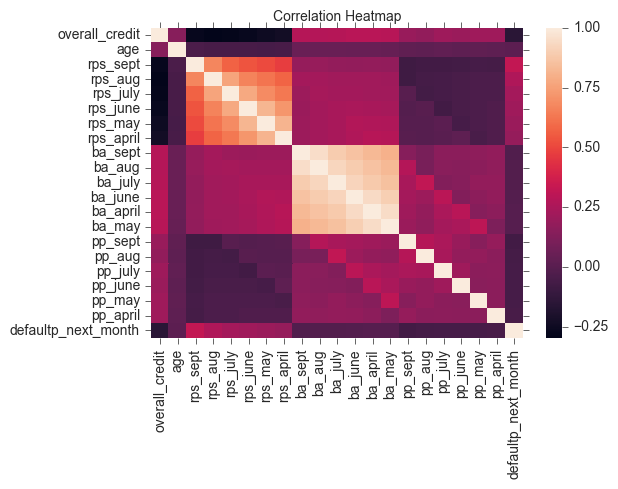

In [14]:
# Heatmap of correlation
corr = credit_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.title( "Correlation Heatmap", fontsize = 10 )

##### From this corelation heatmap we can see that none of our feature variable are highly corelated to class variable(default payment in next month). We also observe that Repayment status for different months are highly corelated and bill amount for different months are highly corelated

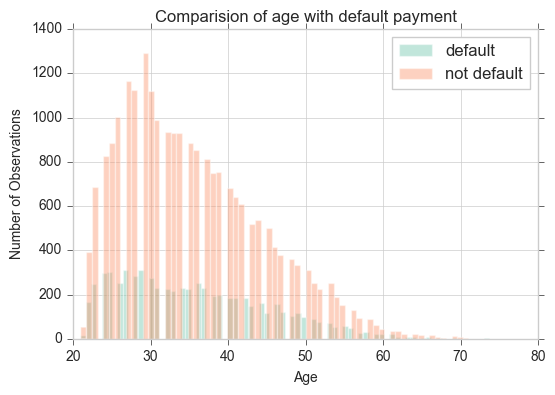

In [15]:
sns.distplot(a = eda_credit_data["age"][eda_credit_data["defaultp_next_month"] == 1],
             kde = False, norm_hist = False, label = "default", bins = 80)
sns.distplot(a = eda_credit_data["age"][eda_credit_data["defaultp_next_month"] == 0],
             kde = False, norm_hist = False, label = "not default", bins = 80)
plt.title("Distribution of people's age who are at default")
plt.xlabel('Age')
plt.ylabel('Number of Observations')
plt.title("Comparision of age with default payment")
plt.legend()
plt.show()

##### The age distribution of our dataset is right skewed.Most of the people in the dataset are between 25 - 40 year group. The ratio of defaulters and non defaulters for age group looks constant across all the ages 

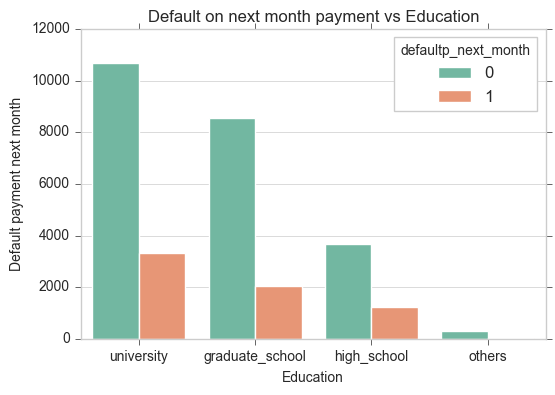

In [16]:
ax = sns.countplot(x = "education",
                   hue = "defaultp_next_month",
                   data = eda_credit_data)
plt.title("Default on next month payment vs Education")
ax.set(xlabel='Education', ylabel='Default payment next month')


##### From this graph we see that education level doesn't help us is determining defaulters. 

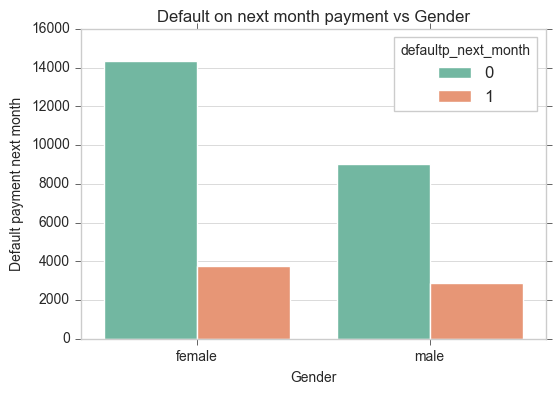

In [17]:
ax = sns.countplot(x = "gender",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Gender")
ax.set(xlabel='Gender', ylabel='Default payment next month')


##### The number of females in out dataset is higher than male but the ratio of defaulters across gender also looks constant

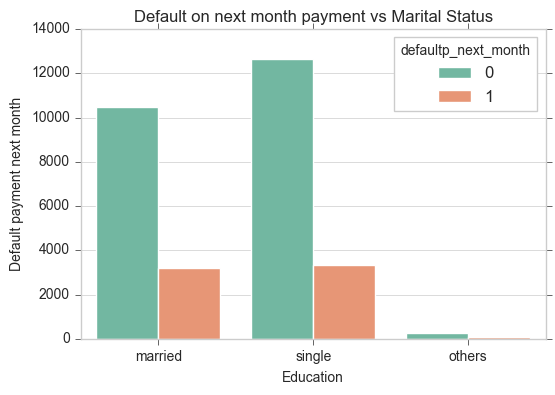

In [18]:
ax = sns.countplot(x = "marital_status",
                   hue = "defaultp_next_month", data = eda_credit_data)
plt.title("Default on next month payment vs Marital Status")
ax.set(xlabel='Education', ylabel='Default payment next month')


##### From this graph we can see that married people have defaulted more then single people. 

In [19]:
# g = sns.FacetGrid(data = eda_credit_data, row = 'defaultp_next_month', sharex = False, sharey = False, aspect = 2.5)
# g.map_dataframe(countplot, 'education', hue = 'gender')
# g.add_legend()

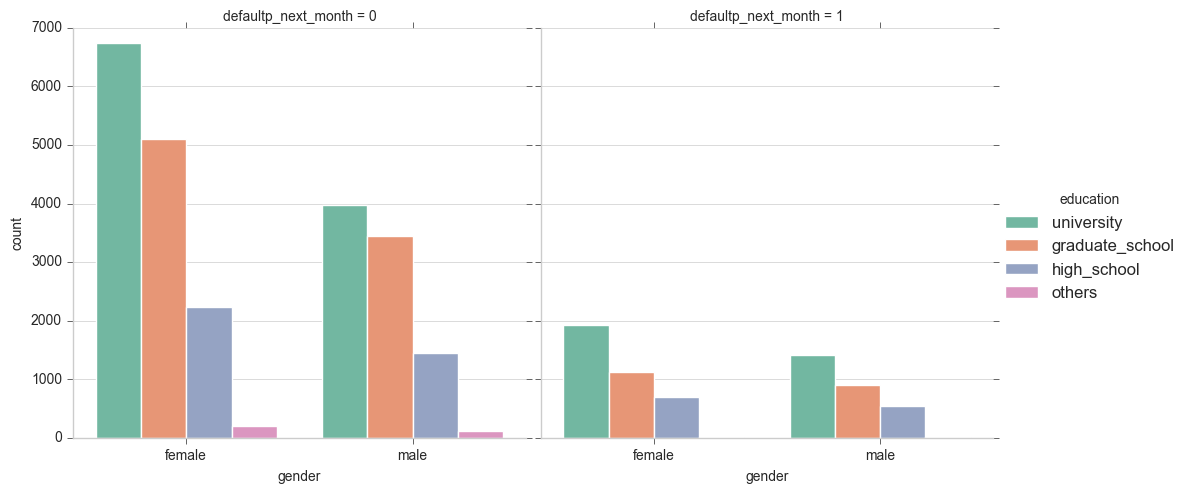

In [20]:
ax = sns.catplot(x = "gender", hue = "education", 
            col = "defaultp_next_month",
            data = eda_credit_data, kind = "count")

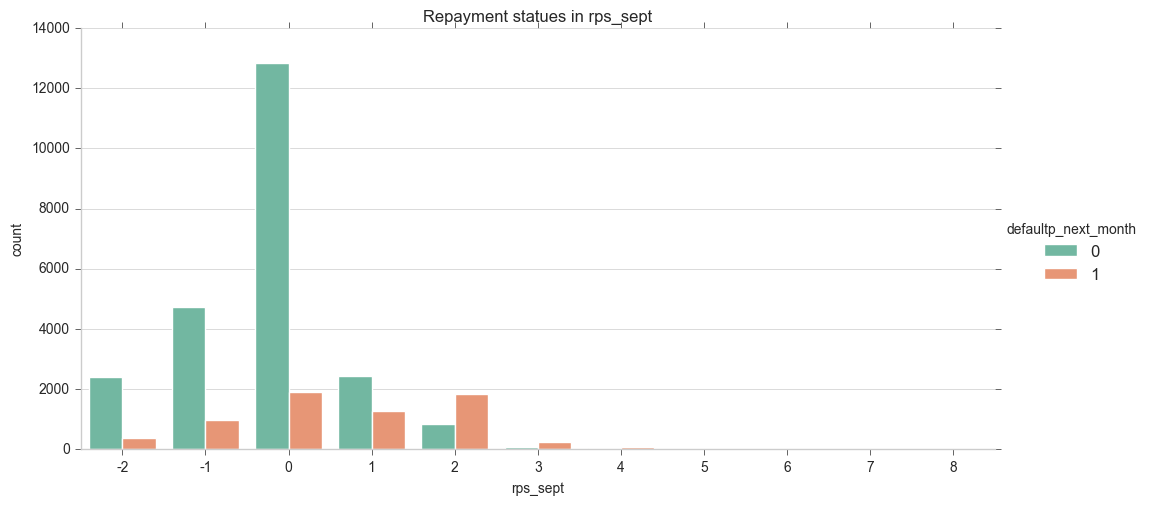

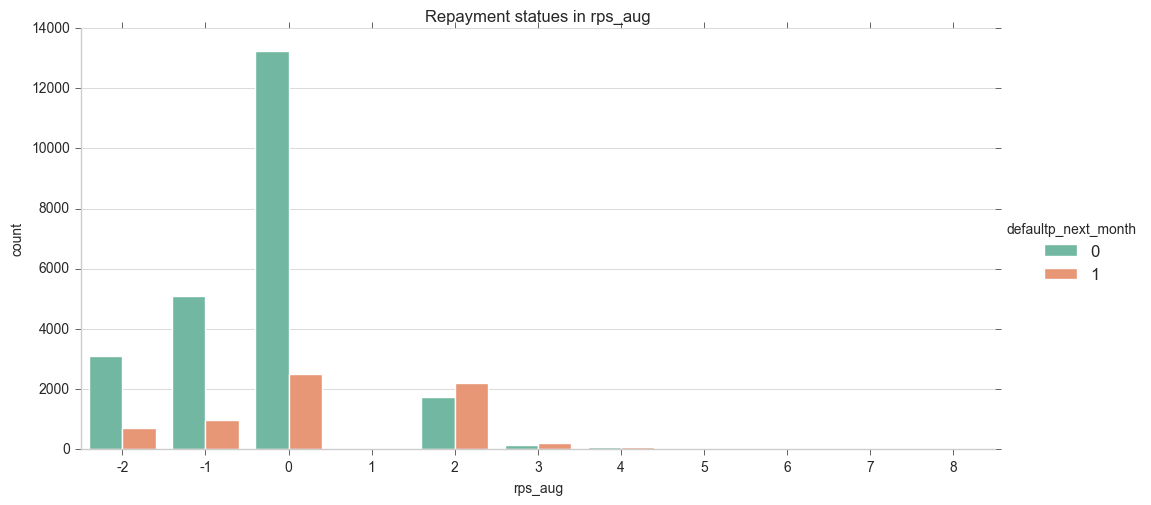

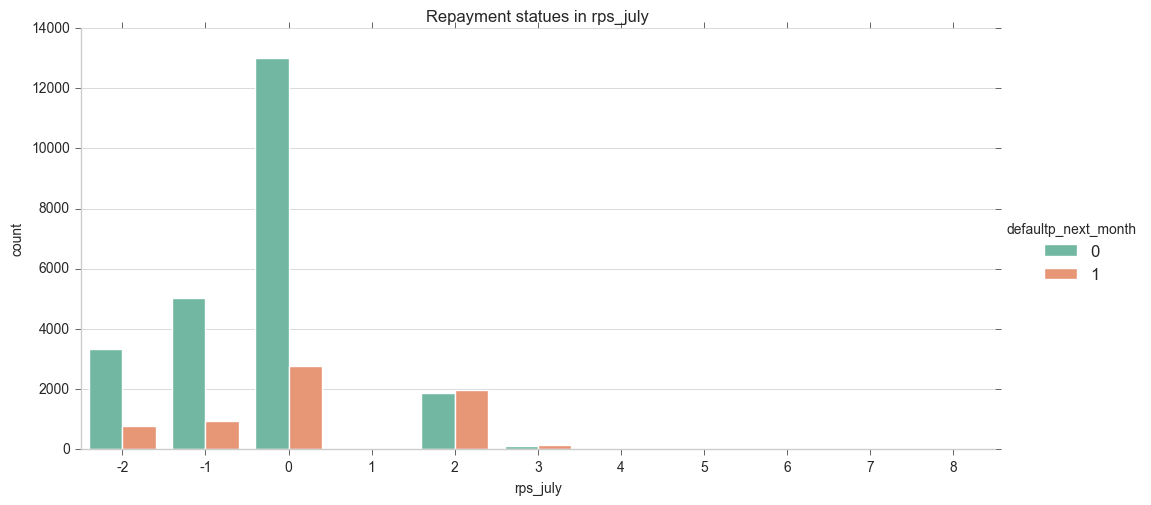

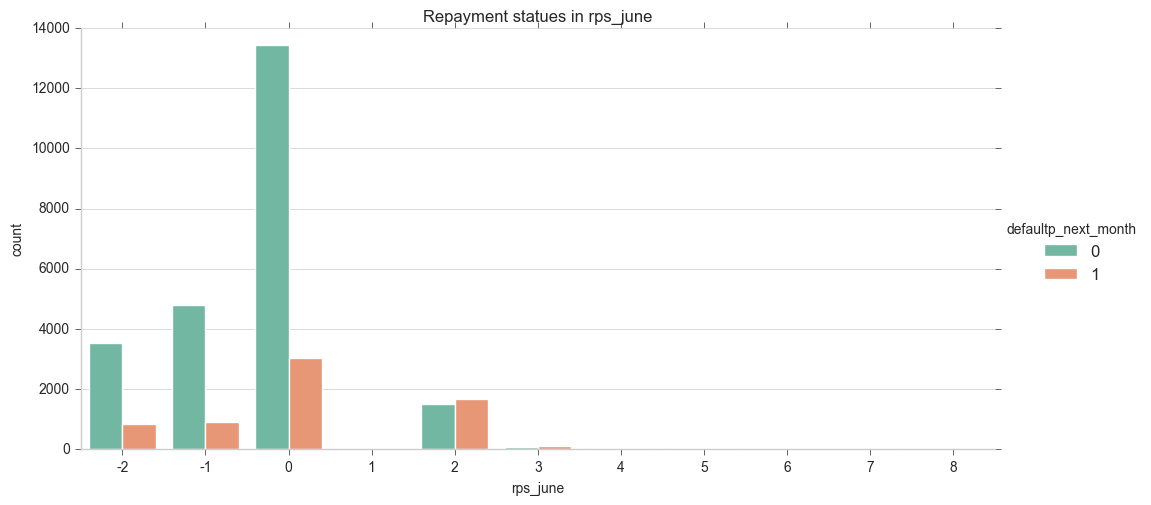

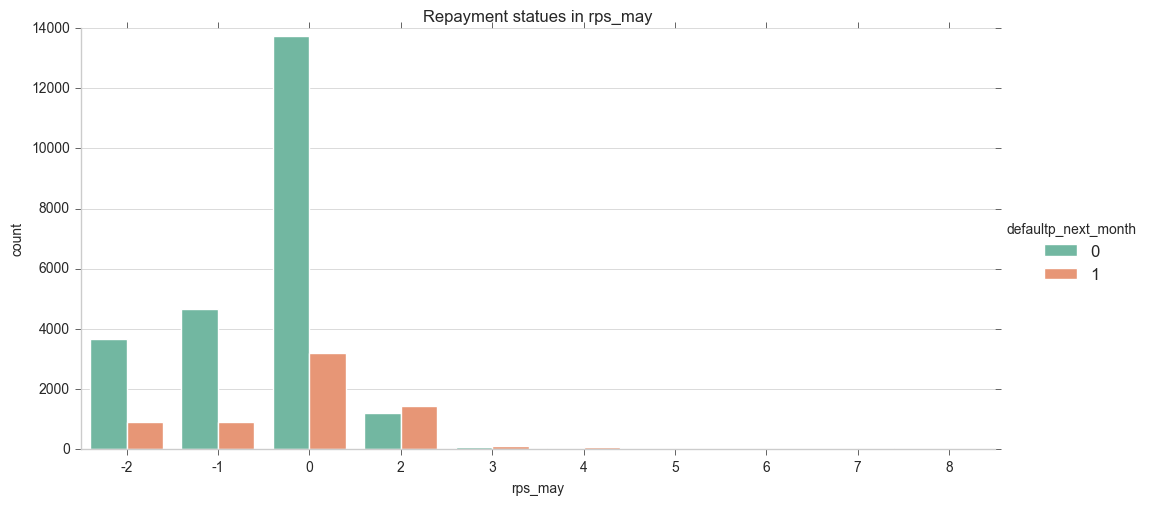

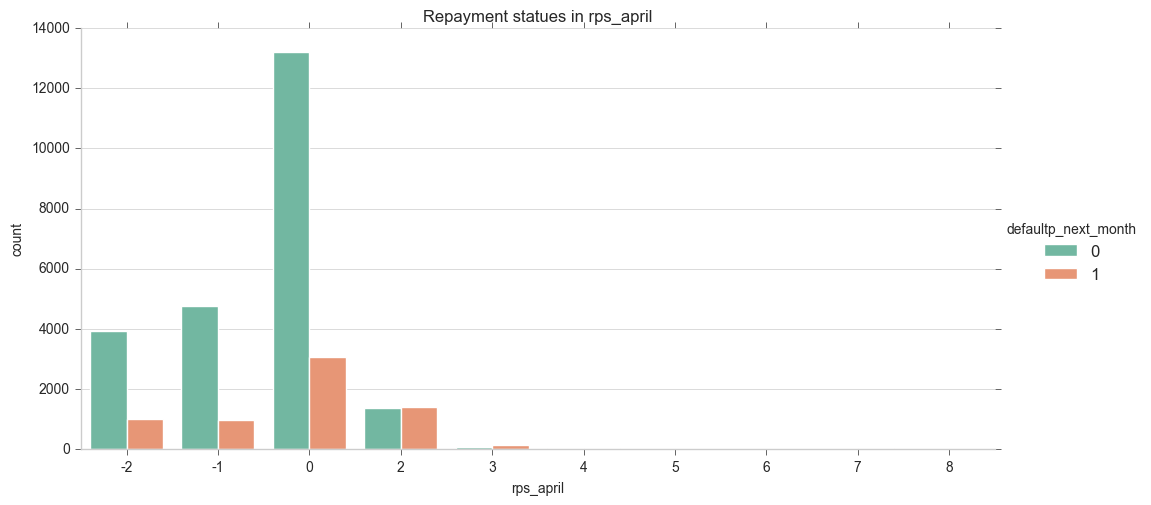

In [21]:
for column in credit_data.columns[5:11]:
    ax = sns.catplot(x = column, hue = "defaultp_next_month",
                data = eda_credit_data, kind = "count",
                 aspect = 2, height = 5)
    plt.title("Repayment statues in " + column)

##### From this repayment status we can observe that people who have delayed their payment for 2 months have in general higher probability of defaulting then no defaulting. We also find that for the month of may and april there are no datapoints where the repayment status is delayed for a month. Also, for month june july and august there are unusually less data points for 1 month delay in repaying the bill

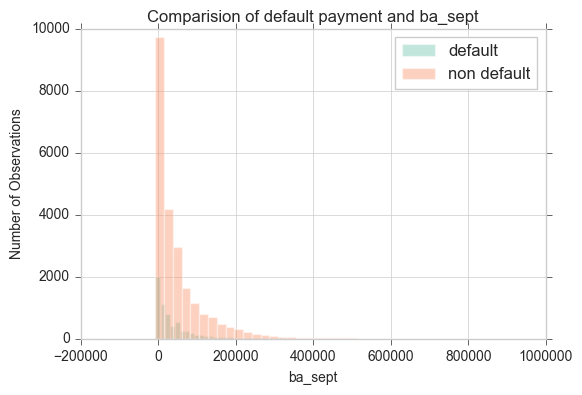

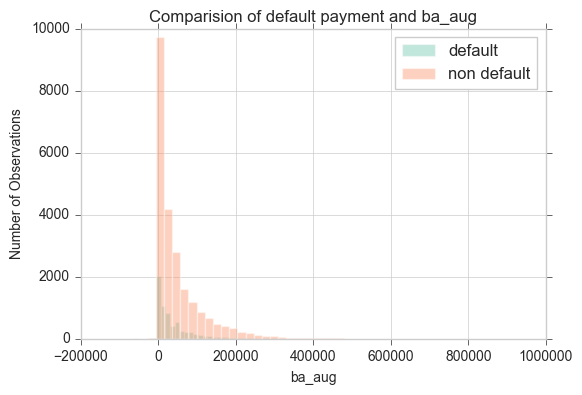

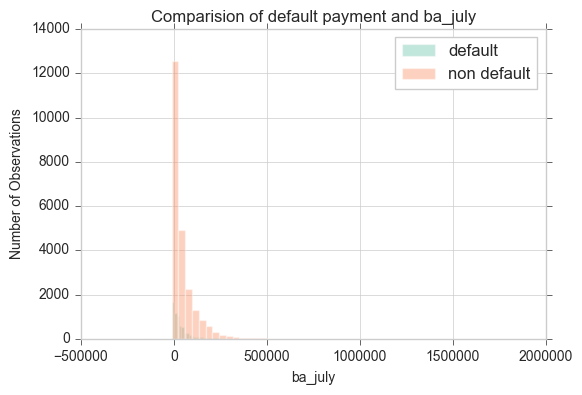

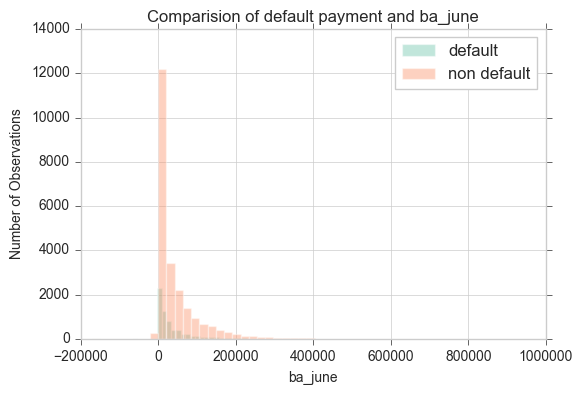

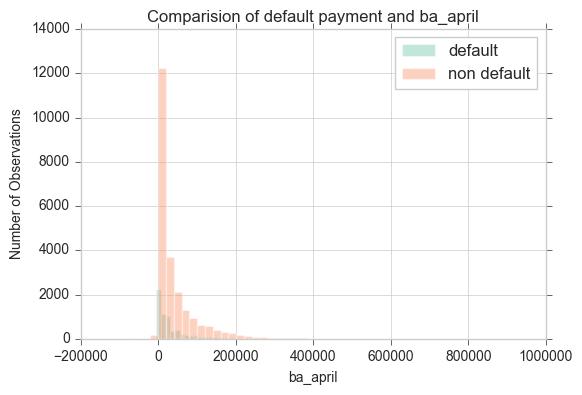

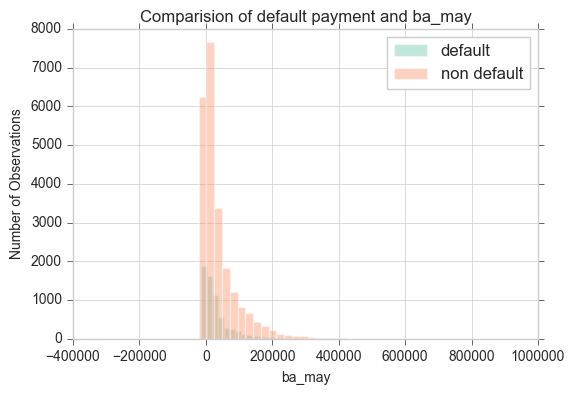

In [22]:
for column in credit_data.columns[11:17]:
    sns.distplot(a = eda_credit_data[column][eda_credit_data["defaultp_next_month"] == 1],
                 kde = False, norm_hist = False, label = "default")
    sns.distplot(a = eda_credit_data[column][eda_credit_data["defaultp_next_month"] == 0],
                 kde = False, norm_hist = False, label = "non default")
    plt.xlabel(column)
    plt.ylabel('Number of Observations')
    plt.title("Comparision of default payment and " + column)
    plt.legend()
    plt.show()


##### Bill amount and defaulters look constant across all the months

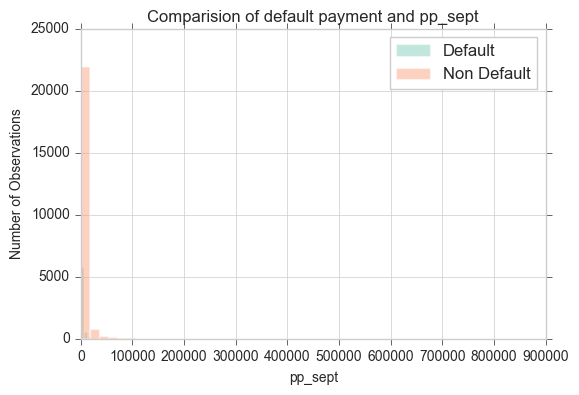

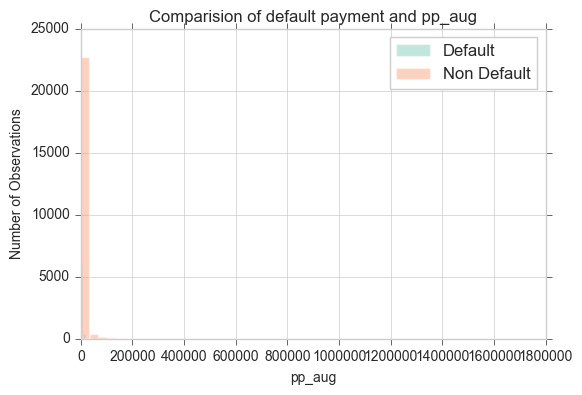

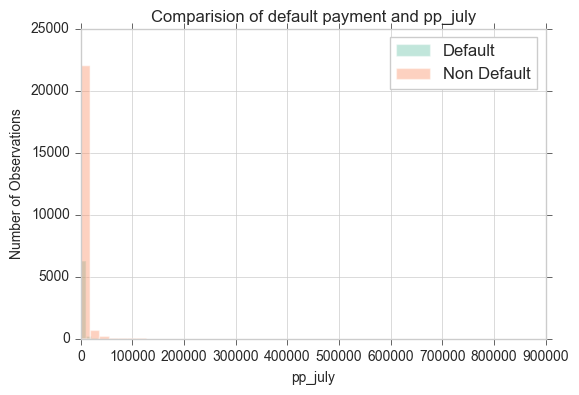

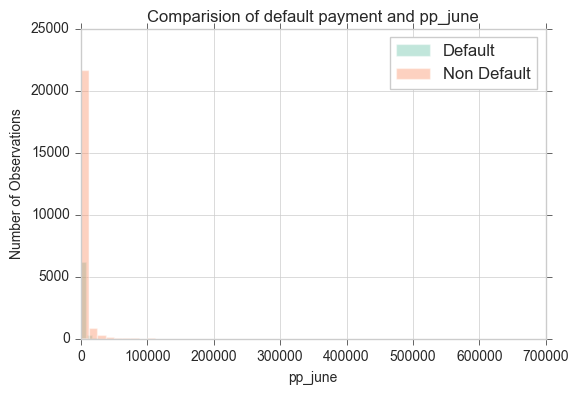

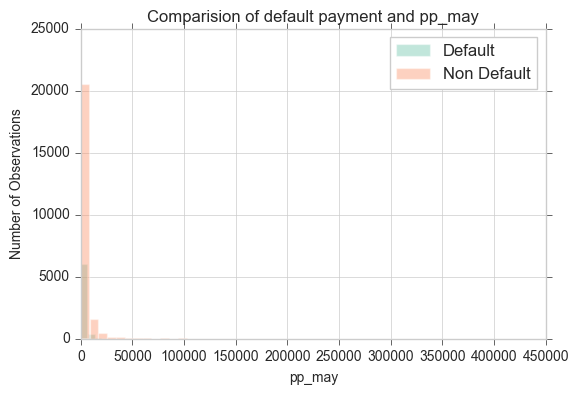

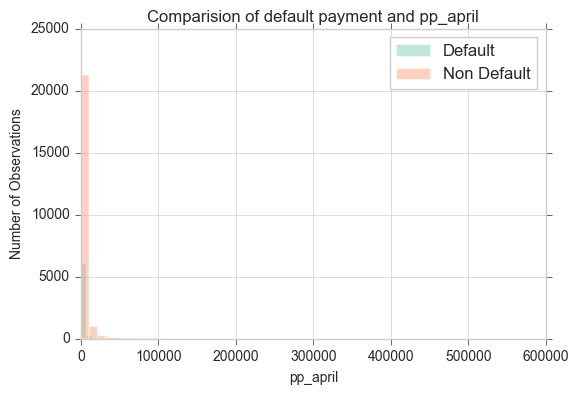

In [23]:
for column in credit_data.columns[17:23]:
    sns.distplot(a = eda_credit_data[column][eda_credit_data["defaultp_next_month"] == 1],
                 kde = False, norm_hist = False, label = "Default")
    sns.distplot(a = eda_credit_data[column][eda_credit_data["defaultp_next_month"] == 0],
                 kde = False, norm_hist = False, label = "Non Default")
    plt.xlabel(column)
    plt.ylabel('Number of Observations')
    plt.title("Comparision of default payment and " + column)
    plt.legend()
    plt.show()

##### Paid amount and defaulters look constant across all the months. Although the bill amount and paid amount for different months does'nt have a matching trend. There are more number of people who recieved high credit card bill (> 100k) but the number of people who paid amount high amount bill (> 100k) is less.

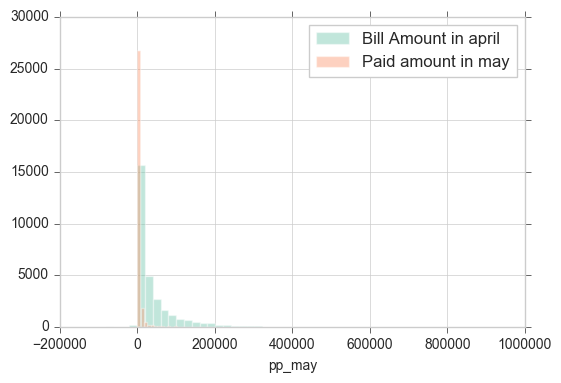

In [24]:
sns.distplot(a = eda_credit_data["ba_april"],
            kde = False, norm_hist = False, label = "Bill Amount in april")
sns.distplot(a = eda_credit_data["pp_may"],
             kde = False, norm_hist = False, label = "Paid amount in may")
plt.legend()
plt.show()

##### This graph confirms are above observation

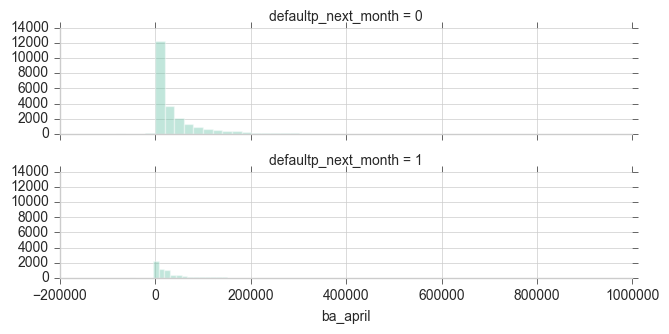

In [25]:
g = sns.FacetGrid(eda_credit_data, row="defaultp_next_month",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "ba_april", kde = False, norm_hist = False)

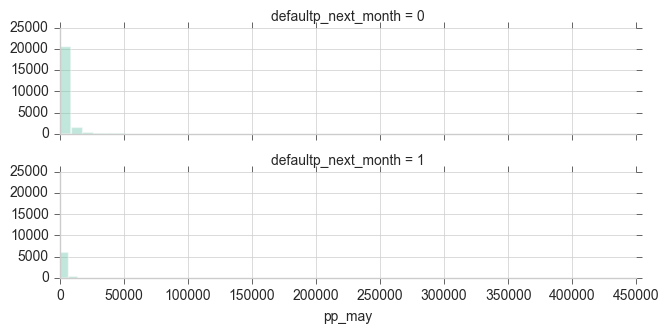

In [26]:
g = sns.FacetGrid(eda_credit_data, row="defaultp_next_month",
                  height=1.7, aspect=4,)
g.map(sns.distplot, "pp_may", kde = False, norm_hist = False)

### Anamoly detection

In [27]:
all_rps_delayed = eda_credit_data.loc[(eda_credit_data['rps_sept'] > 0) & (eda_credit_data['rps_aug'] > 0) &
                    (eda_credit_data['rps_july'] > 0) & (eda_credit_data['rps_june'] > 0) &
                    (eda_credit_data['rps_april'] > 0) & (eda_credit_data['rps_may'] > 0)]

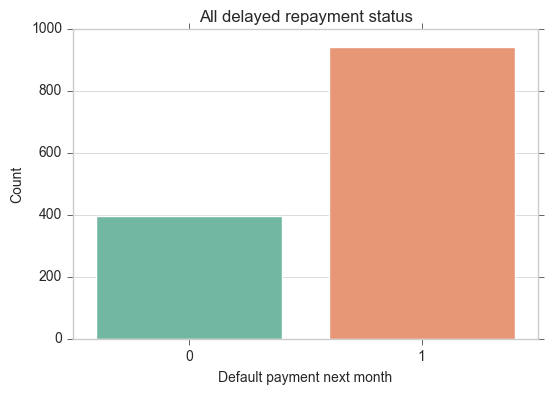

In [102]:
ax = sns.countplot(x = "defaultp_next_month", data = all_rps_delayed)
ax.set(xlabel='Default payment next month', ylabel='Count')
plt.title("All delayed repayment status")

In [29]:
all_rps_delayed["defaultp_next_month"].value_counts()[1] / all_rps_delayed["defaultp_next_month"].count() *  100

70.320656226696499

In [30]:
all_rps_delayed["defaultp_next_month"].value_counts()[1] 

943

In [31]:
all_rps_delayed["defaultp_next_month"].count()

1341

##### The above graph plots the data where the users have delayed their payment status for every month. All those accounts should be defaulters but some 400 accounts are assigned not default. 

In [32]:
any_rps_delayed = eda_credit_data.loc[(eda_credit_data['rps_sept'] > 0) | (eda_credit_data['rps_aug'] > 0) |
                    (eda_credit_data['rps_july'] > 0) | (eda_credit_data['rps_june'] > 0) |
                    (eda_credit_data['rps_april'] > 0) | (eda_credit_data['rps_may'] > 0)]

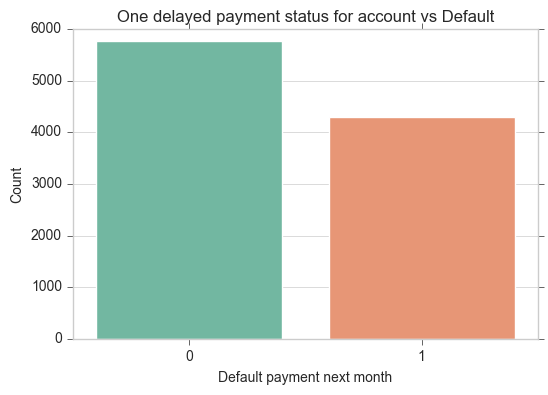

In [101]:
ax = sns.countplot(x = "defaultp_next_month", data = any_rps_delayed)
ax.set(xlabel='Default payment next month', ylabel='Count')
plt.title("One delayed payment status for account vs Default")

In [34]:
any_rps_delayed["defaultp_next_month"].value_counts()[1] / any_rps_delayed["defaultp_next_month"].count() *  100

42.725196146588537

In [35]:
any_rps_delayed["defaultp_next_month"].value_counts()[1] 

4302

##### The above graph plots the data where the users have delayed their payment status for any month. From this graph we can say that even if an account defaults in a month the probabilty that the bank assigns him defaulter is less (42%)

In [36]:
balance_may = eda_credit_data["ba_april"] - eda_credit_data["pp_may"] 
balance_may.head(10)

0         0
1      3455
2     13948
3     27890
4     18457
5     18619
6    469253
7     -1846
8     10793
9     11885
dtype: int64

In [37]:
eda_credit_data["rps_may"].head(10)

0   -2
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9   -1
Name: rps_may, dtype: int64

##### From the above dataframe values we can see some anomolies. For index 7 the person has paid more money then bill amount but his repayment status does not reflect that (it should be -1, paid in full, instead of 0, use of revolving credit)

In [98]:
s_april = (eda_credit_data["overall_credit"] - eda_credit_data["ba_april"]).to_frame()
anom_s_april = (s_april < 0)
anom_s_april.columns = ["overlimit_spending"]

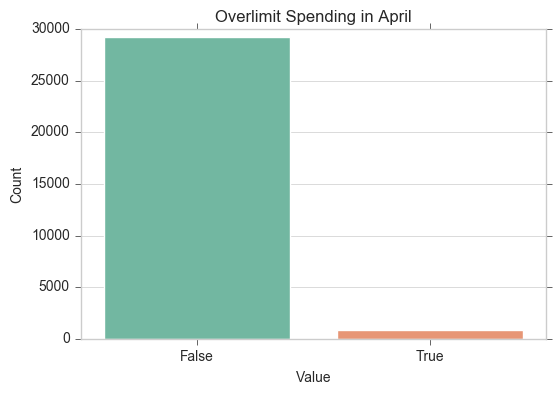

In [99]:
ax = sns.countplot(x = "overlimit_spending", data = anom_s_april)
ax.set(xlabel='Value', ylabel='Count')
plt.title("Overlimit Spending in April")

##### From this graph we see  that there are some accounts who have spend more then their current limit

### Appendix

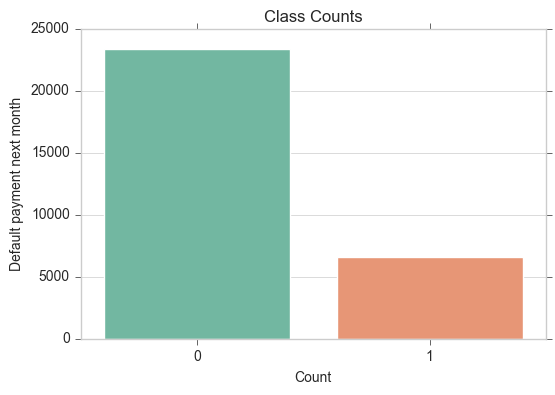

In [71]:
ax = sns.countplot(x = "defaultp_next_month", data = credit_data)
ax.set(xlabel='Count', ylabel='Default payment next month')
plt.title("Class Counts")

In [40]:
eda_credit_data["defaultp_next_month"].value_counts()[1] / eda_credit_data["defaultp_next_month"].count() *  100

22.120000000000001

In [41]:
eda_credit_data["defaultp_next_month"].value_counts()[1]

6636

##### The data set is imbalanced. There are only around 22% of defaulters instant

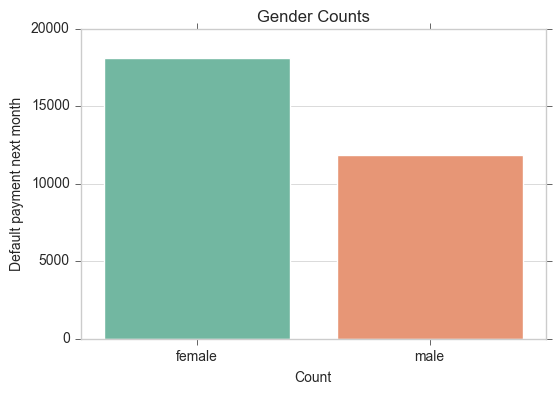

In [42]:
ax = sns.countplot(x = "gender", data = credit_data)
ax.set(xlabel='Count', ylabel='Default payment next month')
plt.title("Gender Counts")

##### There are more number of females then males in our dataset

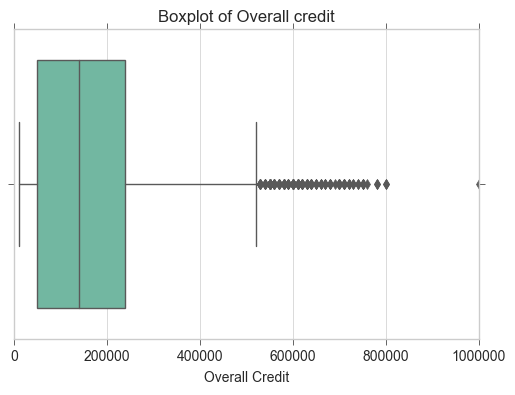

In [43]:
sns.boxplot( credit_data.overall_credit)
plt.title( "Boxplot of Overall credit")
plt.xlabel( "Overall Credit")

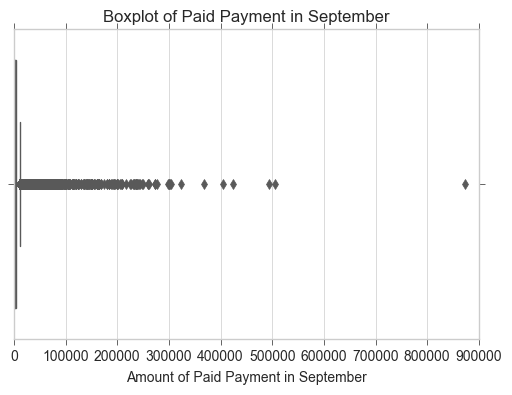

In [44]:
sns.boxplot( eda_credit_data.pp_sept)
plt.title( "Boxplot of Paid Payment in September")
plt.xlabel("Amount of Paid Payment in September")